Improvement 
1. add class weights to handle imbalance datasets
2. increase unites in dense layers and number of layers
3. add BatchNormalication to layers
4. add dropout after layers

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("./Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace= True)

In [4]:
# Label encode Object Datatypes 

data_types_dict = dict(data.dtypes)
# Keep track Mappings Column name to LabelEncoders
Label_encoder_collection = {}
for col_name , data_type in data_types_dict.items():
    if data_type == 'object':
        Le = LabelEncoder()
        data[col_name] = Le.fit_transform(data[col_name])
        Label_encoder_collection[col_name] = Le 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [5]:
X = data.iloc[: , :-1].values.astype(np.float32)
Y = data.iloc[: , -1].values.astype(int)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [8]:
# ----------- Add class weights when Data is Imbalanced -----------------------
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = 'balanced' ,  classes = np.unique(y_train), y=y_train)

model_class_weights = {}
for e , weight in enumerate(class_weights):
    model_class_weights[e] = weight

In [9]:
model_class_weights

{0: 0.6290297216543481, 1: 2.437538086532602}

In [10]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(10,)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization()) #JUST FOUND OUT U CAN JUST NORMALIZE DATASETS USING KERAS LIB -.-

model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               1408      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [11]:
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(Optimizer, loss='binary_crossentropy', metrics=["accuracy"])

In [12]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
250/250 [==============================] - 1s 2ms/step - loss: 0.4533 - accuracy: 0.7971 - val_loss: 0.3836 - val_accuracy: 0.8400
Epoch 2/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4063 - accuracy: 0.8289 - val_loss: 0.3437 - val_accuracy: 0.8605
Epoch 3/20
250/250 [==============================] - 0s 1ms/step - loss: 0.3846 - accuracy: 0.8367 - val_loss: 0.3379 - val_accuracy: 0.8655
Epoch 4/20
250/250 [==============================] - 0s 1ms/step - loss: 0.3840 - accuracy: 0.8378 - val_loss: 0.3359 - val_accuracy: 0.8670
Epoch 5/20
250/250 [==============================] - 0s 1ms/step - loss: 0.3710 - accuracy: 0.8420 - val_loss: 0.3344 - val_accuracy: 0.8640
Epoch 6/20
250/250 [==============================] - 0s 1ms/step - loss: 0.3738 - accuracy: 0.8438 - val_loss: 0.3326 - val_accuracy: 0.8680
Epoch 7/20
250/250 [==============================] - 0s 1ms/step - loss: 0.3668 - accuracy: 0.8475 - val_loss: 0.3250 - val_accuracy: 0.8655
Epoch 

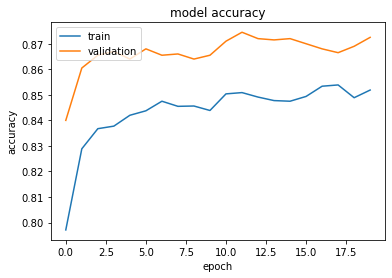

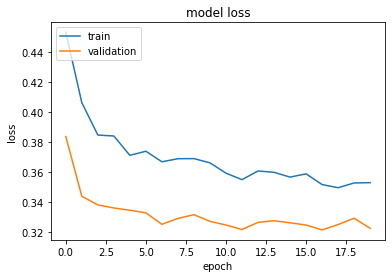

In [13]:
#  "Accuracy Plot"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss Plot"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# a lot of fluctuations in Accuracy Graph which concludes model learning is unstable 

In [14]:
predictions=np.round(model.predict(X_test))

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, predictions)

0.8725

In [16]:
confusion_matrix(y_test, predictions)

array([[1535,   69],
       [ 186,  210]], dtype=int64)